In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

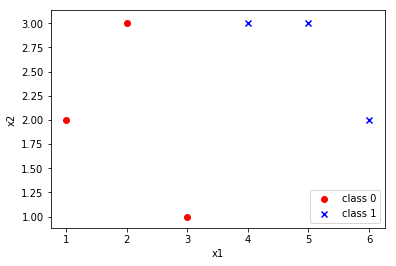

In [3]:
x_data = np.array([[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]])
y_data = np.array([[0],
          [0],
          [0],
          [1],
          [1],
          [1]])

plt.scatter(x_data[:3, 0], x_data[:3, 1],
            color='red', marker='o', label='class 0')
plt.scatter(x_data[3:, 0], x_data[3:, 1],
            color='blue', marker='x', label='class 1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower right')
plt.show()

In [4]:
epoch=2000
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid'))

sgd = tf.keras.optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=model.fit(x_data, y_data, epochs=epoch)

W0723 00:13:08.288868 139945637136256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6 samples
Epoch 1/2000
6/6 [==============================] - 0s 10ms/sample - loss: 0.5510
Epoch 2/2000
6/6 [==============================] - 0s 949us/sample - loss: 0.5382
Epoch 3/2000
6/6 [==============================] - 0s 815us/sample - loss: 0.5315
Epoch 4/2000
6/6 [==============================] - 0s 818us/sample - loss: 0.5277
Epoch 5/2000
6/6 [==============================] - 0s 850us/sample - loss: 0.5253
Epoch 6/2000
6/6 [==============================] - 0s 310us/sample - loss: 0.5235
Epoch 7/2000
6/6 [==============================] - 0s 651us/sample - loss: 0.5221
Epoch 8/2000
6/6 [==============================] - 0s 566us/sample - loss: 0.5209
Epoch 9/2000
6/6 [==============================] - 0s 648us/sample - loss: 0.5197
Epoch 10/2000
6/6 [==============================] - 0s 242us/sample - loss: 0.5186
Epoch 11/2000
6/6 [==============================] - 0s 629us/sample - loss: 0.5175
Epoch 12/2000
6/6 [==============================] - 0s 611us/sampl

In [6]:
print("2,1", model.predict_classes(np.array([[2, 1]])))
print("6,5", model.predict_classes(np.array([[6, 5]])))

2,1 [[0]]
6,5 [[1]]


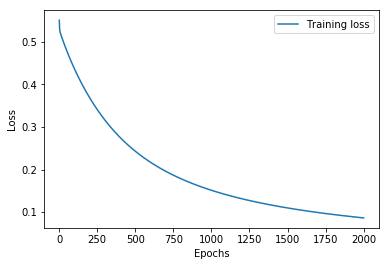

In [7]:
epochs = np.arange(1, epoch+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
#plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



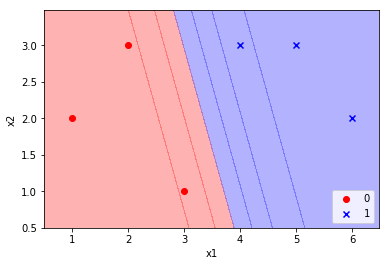

In [8]:
plt.scatter(x_data[:3, 0], x_data[:3, 1],
            color='red', marker='o', label='0')
plt.scatter(x_data[3:, 0], x_data[3:, 1],
            color='blue', marker='x', label='1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower right')

resolution=0.02
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
x1_min, x1_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
x2_min, x2_max = x_data[:, 1].min() - 0.5, x_data[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
